#### Naive Bayes

Implementação de um classificador Naive Bayes que considera as probabilidades de forma independente um do outro. O algoritmo assumo que todos os atributos independentes dos dados são independentes entre si e que eles são igualmente importantes para prever o atributo dependente.

Por ser um algoritmo de classificação o resultado é semelhante a uma regressão logística, é um dado categórico binário, sim ou não, verdadeiro ou falso.

Ele também é um algoritmo supervisionado porque para gerar uma predição e um modelo necessita da supervisão de alguém que passa os dados de entrada e saída para o algoritmo.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix


Os dados da base Credit.csv são clientes de um banco alemão que solicitaram crédito e será utilizado o classificador para classificá-los em bons e maus pagadores.

In [16]:
credito = pd.read_csv("data/Credit.csv")
credito.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad
999,0<=X<200,45,'critical/other existing credit','used car',4576,100<=X<500,unemployed,3,'male single',none,...,car,27,none,own,1,skilled,1,none,yes,good


Pelo método `tail` observa-se que o dataset possui 21 atributos e 1000 entradas. Dentre os atributos constam atributos categóricos e atributos numéricos. A última coluna, a coluna class é a que será prevista.

O objetivo é criar um modelo onde ao adicionar um novo cliente, a partir dos atributos será determinado se ele será um bom pagador ou não.

Para começar o dataset será divido entre previsores e classe, onde os previsores serão so atributos de 0 a 20. A classe a ser prevista, que é a última classe, é separado em outra variável.

In [17]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

Para uilizar o Naive Bayes é necessário transformar os atributos categóricos em atributos numéricos, para isso será utilizado a técnica de label encoder. É necssário transformar cada atributo em um objeto da classe `LabelEncoder` que é uma classe da biblioteca `sklearn.preprocessing` e depois executar o processo de encoding para o treino.

Esse encoding é usado em cada variável categórica e as variáveis numéricas são puladas.



In [18]:
le = []
for i in range(20):
    if i not in [1, 4, 7, 10, 12, 15, 17]:
        label = LabelEncoder()
        previsores[:, i] = label.fit_transform(previsores[:, i])
        le.append(label)

Para utilizar o método de aprendizagem de máquina utilizando o Naive Bayes, será necessário dividir os dados em treino e teste, não é bom utilizar os mesmos dados para realizar o teste pois poderá gerar `overfitting` do modelo.

Isso é evitado utilizando o método `train_test_split` da biblioteca `sklearn`. Esse método gera 4 variáveis que são os dados de treino para X (variáveis independentes) e dados de Teste para Y (variável dependente). O método leva como parâmetro os atributos que serão os previsores, o atributo que será o previsto e o tamanho da amostra.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3, random_state = 0)
print(f"Tamanho das variáveis:\nX Treino = {len(x_train)}\nX Teste = {len(x_test)}\nY Treino = {len(y_train)}\nY Teste = {len(y_test)}")

Tamanho das variáveis:
X Treino = 700
X Teste = 300
Y Treino = 700
Y Teste = 300


Foram separados 30% dos dados para teste.

O modelo é criado utilizando o Naive Bayes Gaussiano, da classe `GaussianNB` da biblioteca `sklearn`. Essa classe possui o método `fit` que utiliza os dados de treino das variáveis independentes e das variáveis dependentes para gerar o modelo.

In [20]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

Com o modelo criado é possível testá-lo utilizando o método `predict` que passando um valor ou um array de valores, ele resulta na previsão dos dados.

In [21]:
previsoes = naive_bayes.predict(x_test)
print(previsoes)

['bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'goo

Esse resultado é o resultado da classe, dizendo se o cliente é um bom ou mau pagador. Porém esses dados são históricos, é possível saber qual foi o real resultado, se dado cliente é ou não um bom pagador. Uma outra forma de visualizar essa relação, é utilizando uma matriz de confusão, utilizando o método `confusion_matrix` da biblioteca `sklearn`.

A matriz dce confusão é dada como uma comparação entre os verdadeiro e falsos positivos e negativos, conforme mostrado a seguir
\begin{pmatrix}
  Verdadeiros Positivos     & Falsos Positivos \\
  Falsos Negativos          & Verdadeiros Negativos \\
\end{pmatrix}

Os Verdadeiros Positivos (VP) são os valores que eram determinados como verdadeiros e foram corretamente indicados como tal, por exemplo os clientes que eram bons pagadores e foram indicados como bons pagadores.

Os Falsos Positivos (FP) são os cliente que não eram bons pagadores e foram indicados como sendo, logo eram valores falsos que foram indicados como verdadeiros.

Os Falsos Negativos (FN) são os valores que eram verdadeiros e foram determinado como sendo falsos, ou seja os bons pagadores que foram indicados como mau pagadores.

E por fim, os Verdadeiros Negativos (VN), são os maus pagadores que foram corretamente indicados como tal.

In [22]:
cf = confusion_matrix(y_test, naive_bayes.predict(x_test))
print(cf)
print(f"Verdadeiros Positivos: {cf[1][1]}\nFalsos Positivos: {cf[0][1]}\nFalsos Negativos: {cf[1][0]}\nVerdadeiros Negativos: {cf[0][0]}")

[[ 41  45]
 [ 42 172]]
Verdadeiros Positivos: 172
Falsos Positivos: 45
Falsos Negativos: 42
Verdadeiros Negativos: 41


há um número significativo de acerto, mas para saber a taxa de acerto basta somar os VP e VN e dividir pelo total de estimativas, logo:
$$ TaxaAcerto = \frac{VP + VN}{VP + FP + FN + VN} $$

Pode-se também utilizar o método `accuracy_score` que já faz esse cáluco direto.

In [23]:
acerto = accuracy_score(y_test, naive_bayes.predict(x_test))
acerto = round(acerto * 100, 2)
print(f"Taxa de acerto: {acerto}%\nTaxa de erro: {100-acerto}%")

Taxa de acerto: 71.0%
Taxa de erro: 29.0%


Com uma taxa de acero de 71% estima-se que uando esse modelo em produção, ele retornaria aproximadamente 71% de acerto.

É possível verificar graficamente a matriz de confusão, utilizando a classe `ConfusionMatrix` da biblioteca `yellowbrick`.

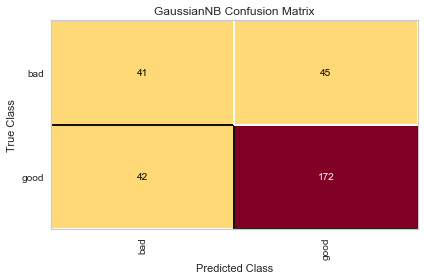

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
cf = ConfusionMatrix(GaussianNB())
cf.fit(x_train, y_train)
cf.score(x_test, y_test)
cf.poof()

O resultado observado pelo `yellowbrick` é o mesmo modelo criado anteriormente.

Para testar uma nova entrada no sistema, é carregado um dado do arquivo NovoCredit.csv

In [25]:
dado = pd.read_csv("data/NovoCredit.csv")
dado.shape

(1, 20)

Nesse arquivo há apenas uma entrada com todos os 20 atributos. Essa entrara, simulando um novo cliente, irá ser testada no modelo e ele fará uma previsão se esse cliente será um bom pagador ou não.

Para isso é necssário converter os atributos categóricos utilizando o `LabelEncoder` criado anteriormente, para manter o padrão nos dados, a mesma iteração realizada anteriormente é realizada agora. O método utilizado é o `transform` para padronizar essa nova entrada. Não precisa utilizar o `fit_transfor` porque a adaptação já foi feita.

In [26]:
dado = dado.iloc[:, 0:20].values
t = 0
for i in range(20):
    if i not in [1, 4, 7, 10, 12, 15, 17]:
        dado[:, i] = le[t].transform(dado[:, i])
        t += 1

Depois de adequar essa nova entrada, é ralizada a previsão com o predict.

In [27]:
naive_bayes.predict(dado)

array(['good'], dtype='<U4')

Então, pelo modelo e os dados do cliente passado como parâmetro, esse novo cliente é previsto como um bom pagador.